**Healthcare**

Importing the Liabraries  

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_openml
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

**Importing The Datasets**

In [12]:
dataset = pd.read_csv('/content/sample_data/health care diabetes.csv')

**Checking Dataset Structure**

In [13]:
dataset.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

**Setting features and lables**

In [14]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

**Data Exploration**

Checking the first 2 rows of Datasets

In [15]:
dataset.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

Checking concise summary of a DataFrame

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Checking lables of Datasets

In [17]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Checking data types in dataframe

In [18]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Checking descriptive statistics

In [19]:
dataset.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

Computing pairwise correlation of columns, excluding NA/null values

In [20]:
dataset.corr().T

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

Checking datatypes for prepare to make count frequency plot

In [21]:
dataset.dtypes.value_counts()

int64      7
float64    2
Name: count, dtype: int64

Checking the balance of the data by count of outcomes by their values

In [22]:
dataset.Outcome.value_counts(normalize = True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

**Data Visulization**

Plotting count frequency plot for describing the data types and the count of variables

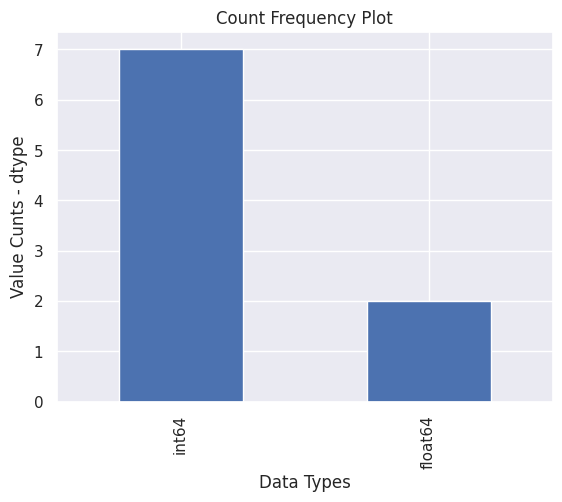

In [23]:
datatype = dataset.dtypes.value_counts()
datatype.plot.bar()
plt.title('Count Frequency Plot')
plt.xlabel('Data Types')
plt.ylabel('Value Cunts - dtype')
plt.show()

Ploting the count frequency plot for describing the 'Outcome' values

Findings:

  1.65% Patients are not Diabetes and 35% Patients are Diabetes


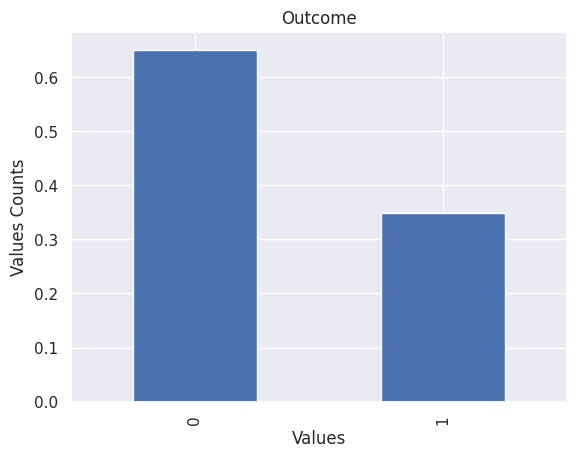

In [24]:
outcome_value = dataset.Outcome.value_counts(normalize = True)
outcome_value.plot.bar()
plt.title('Outcome')
plt.xlabel('Values')
plt.ylabel('Values Counts')
plt.show()

Ploting hostogram to see distribution of variables with uncharged data

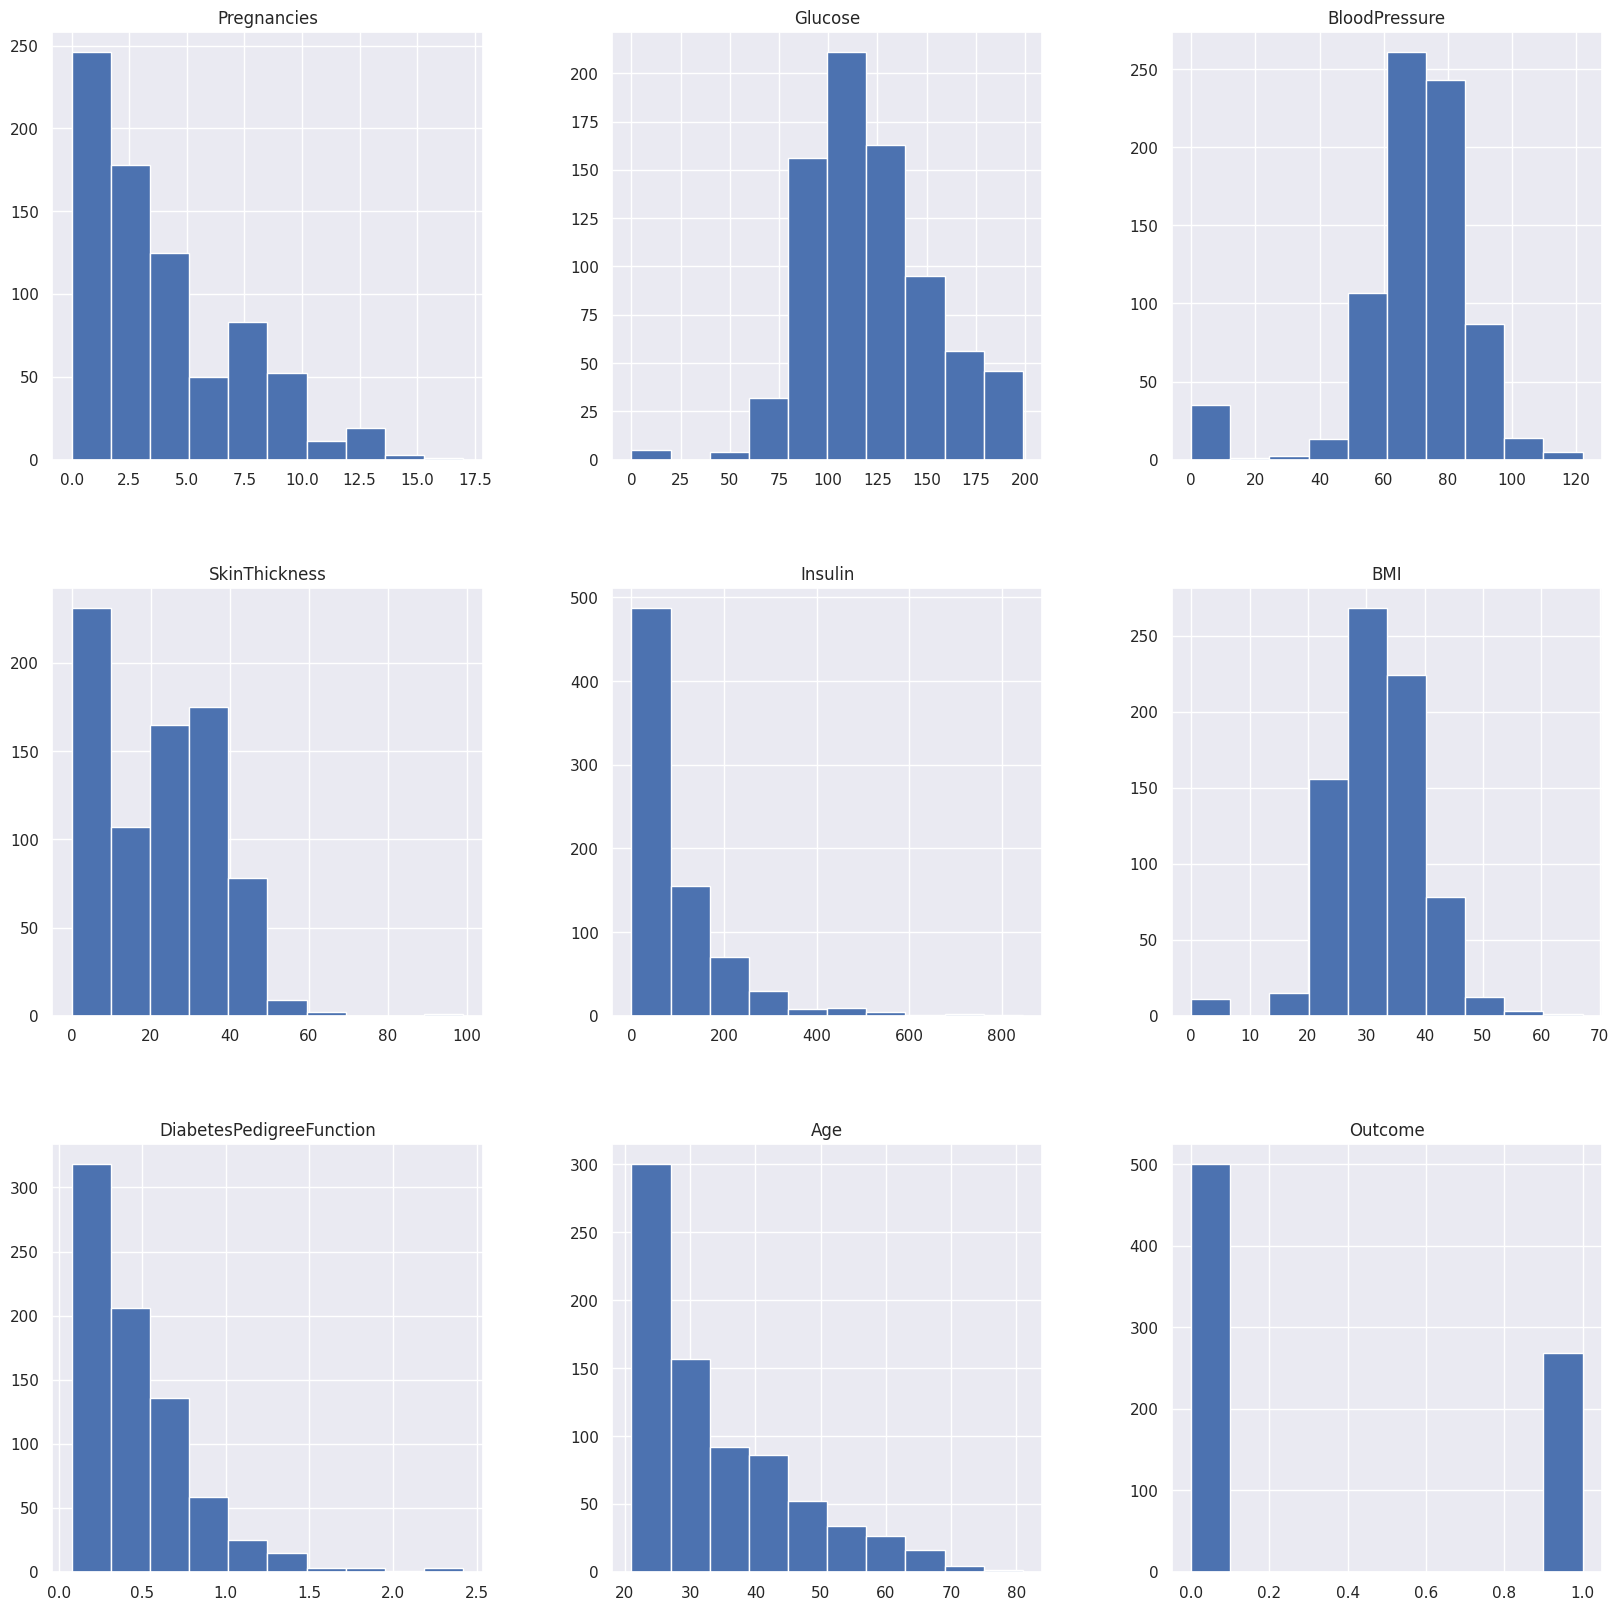

In [25]:
histogram = dataset.hist(figsize = (20, 20))

Checking outliers present in dataset

1. Insulin having hugh outlier present as '0' which is missing values

<Axes: >

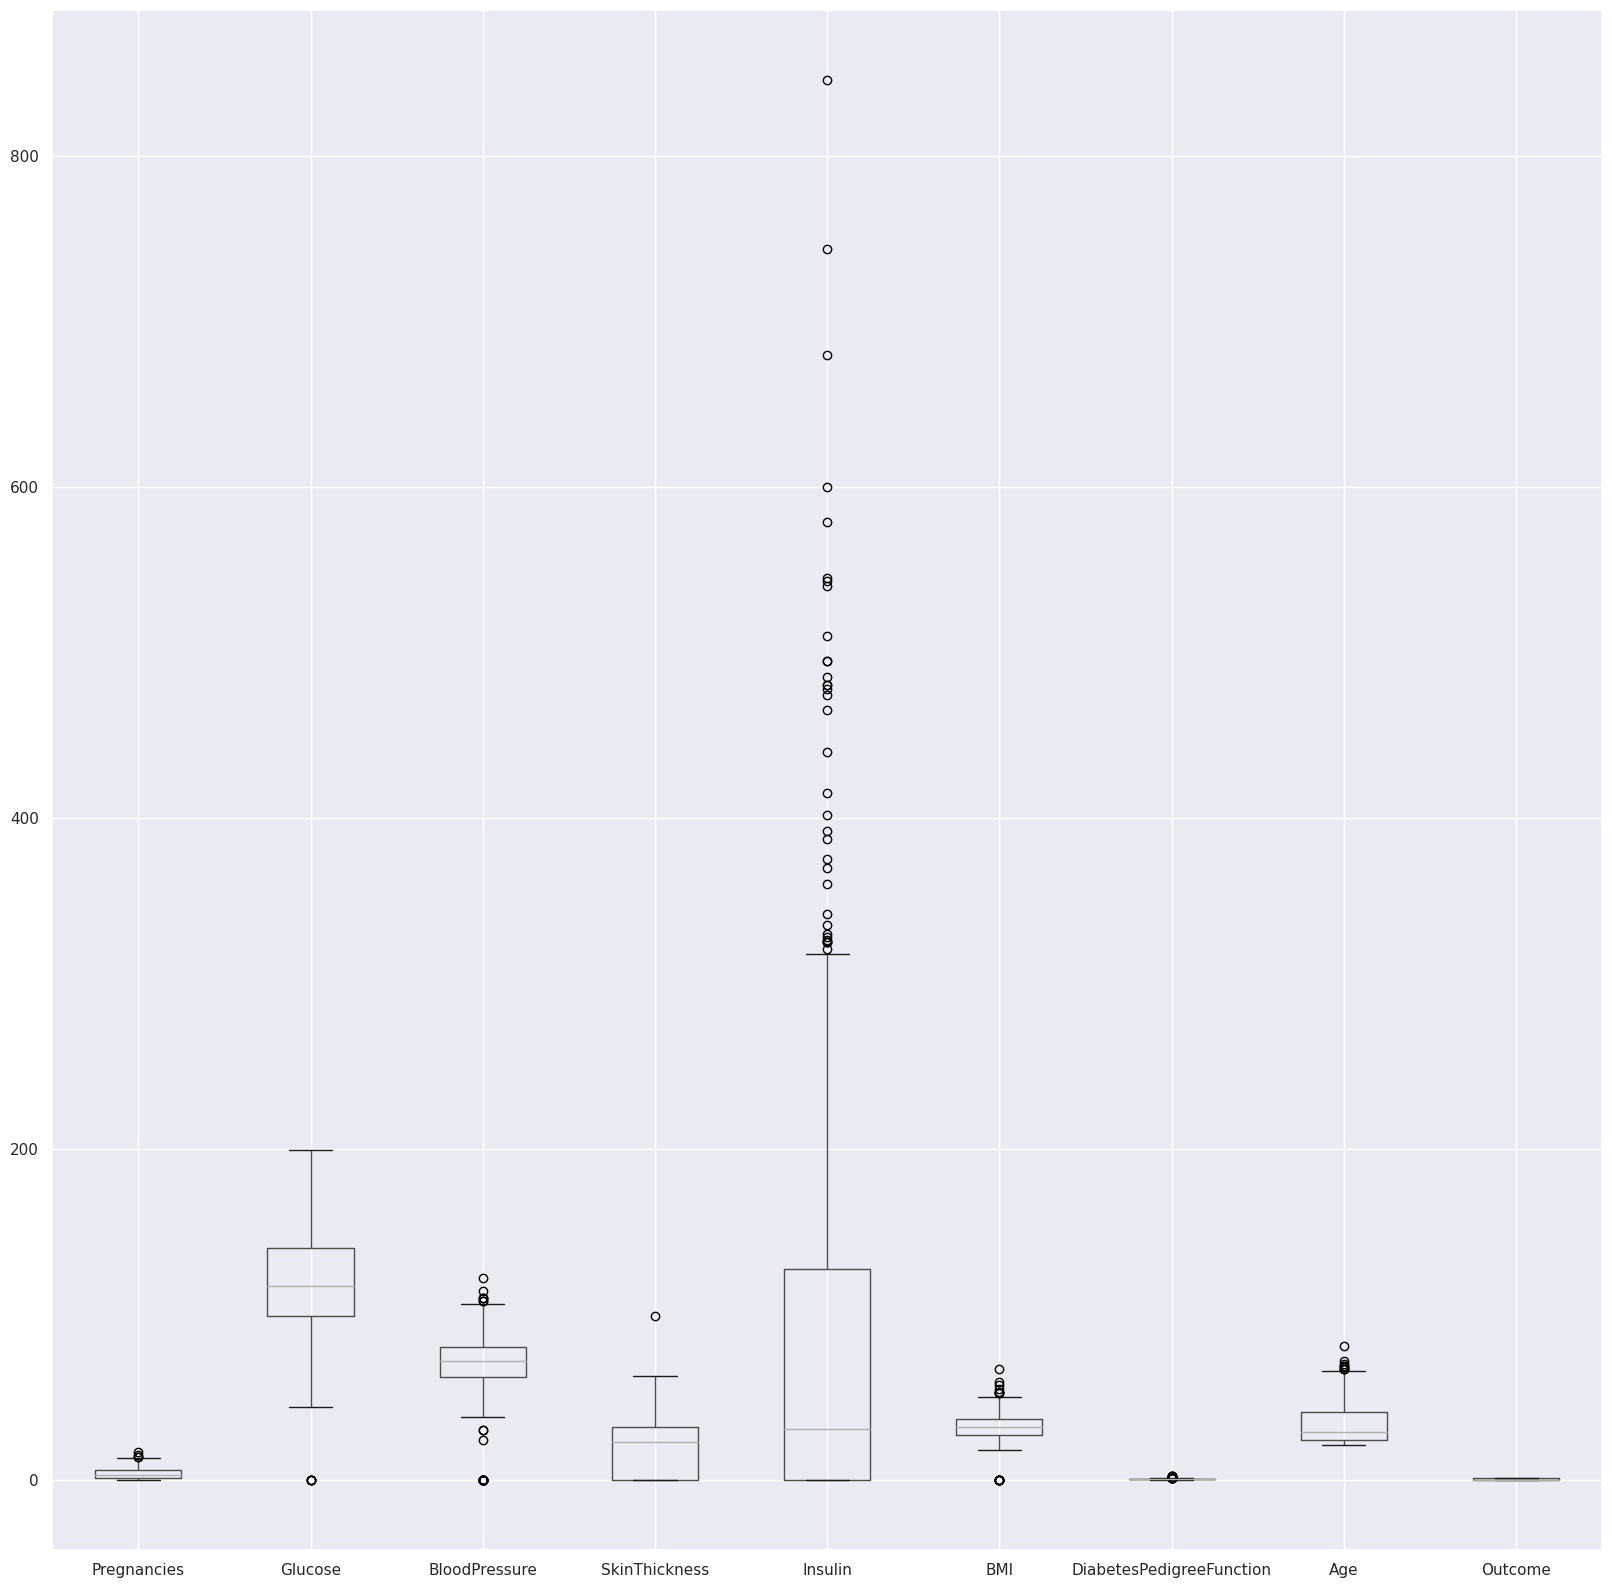

In [26]:
dataset.boxplot(figsize=(20, 20))

Ploting hostogram to see distribution of variables after removing null values

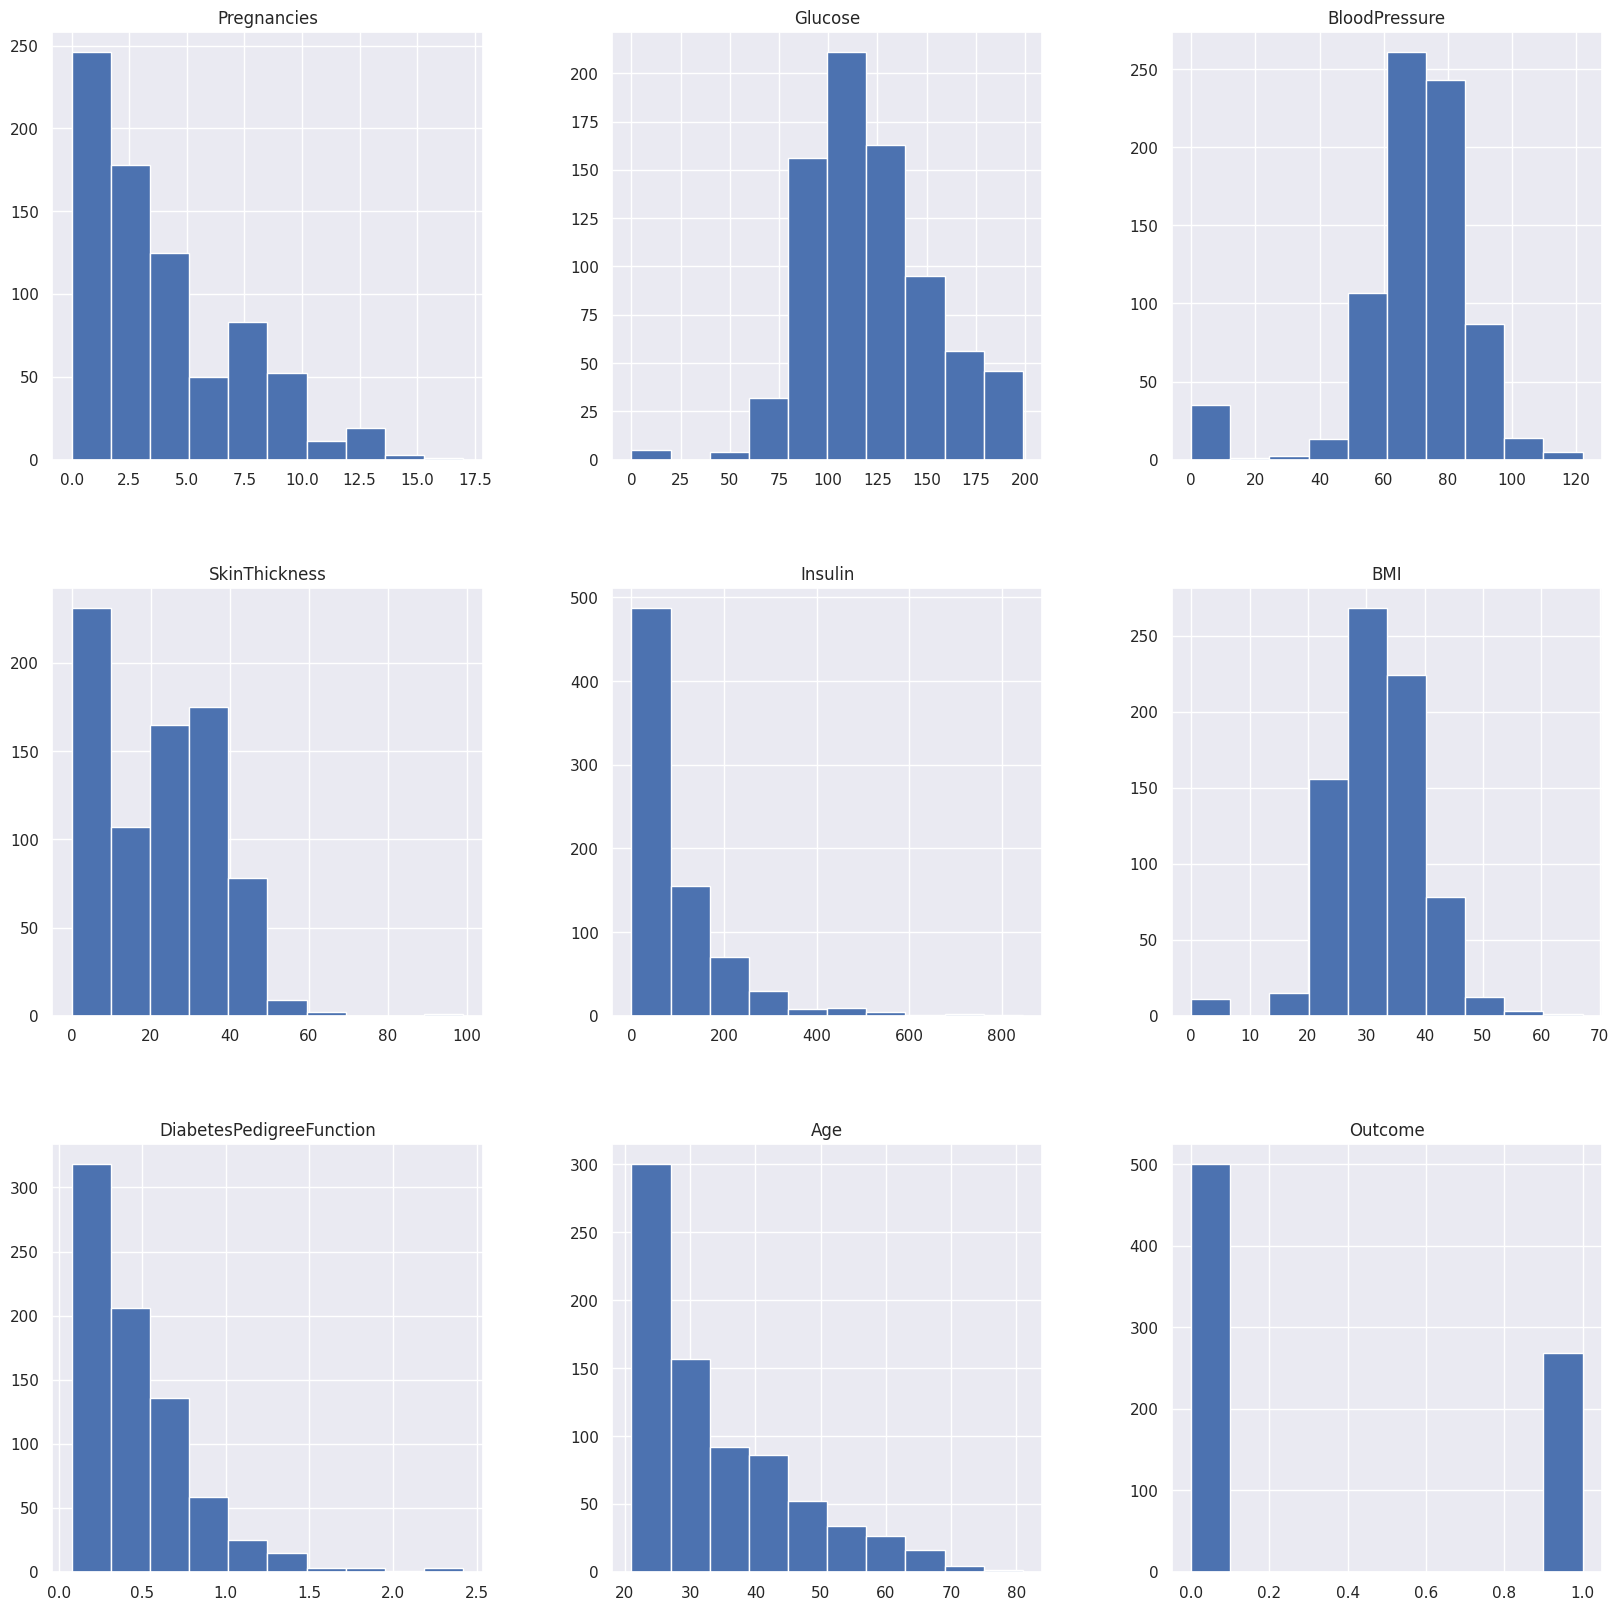

In [27]:
histogram = dataset.hist(figsize = (20, 20))

Ploting scatter charts between the pair of variables to understand the relationships

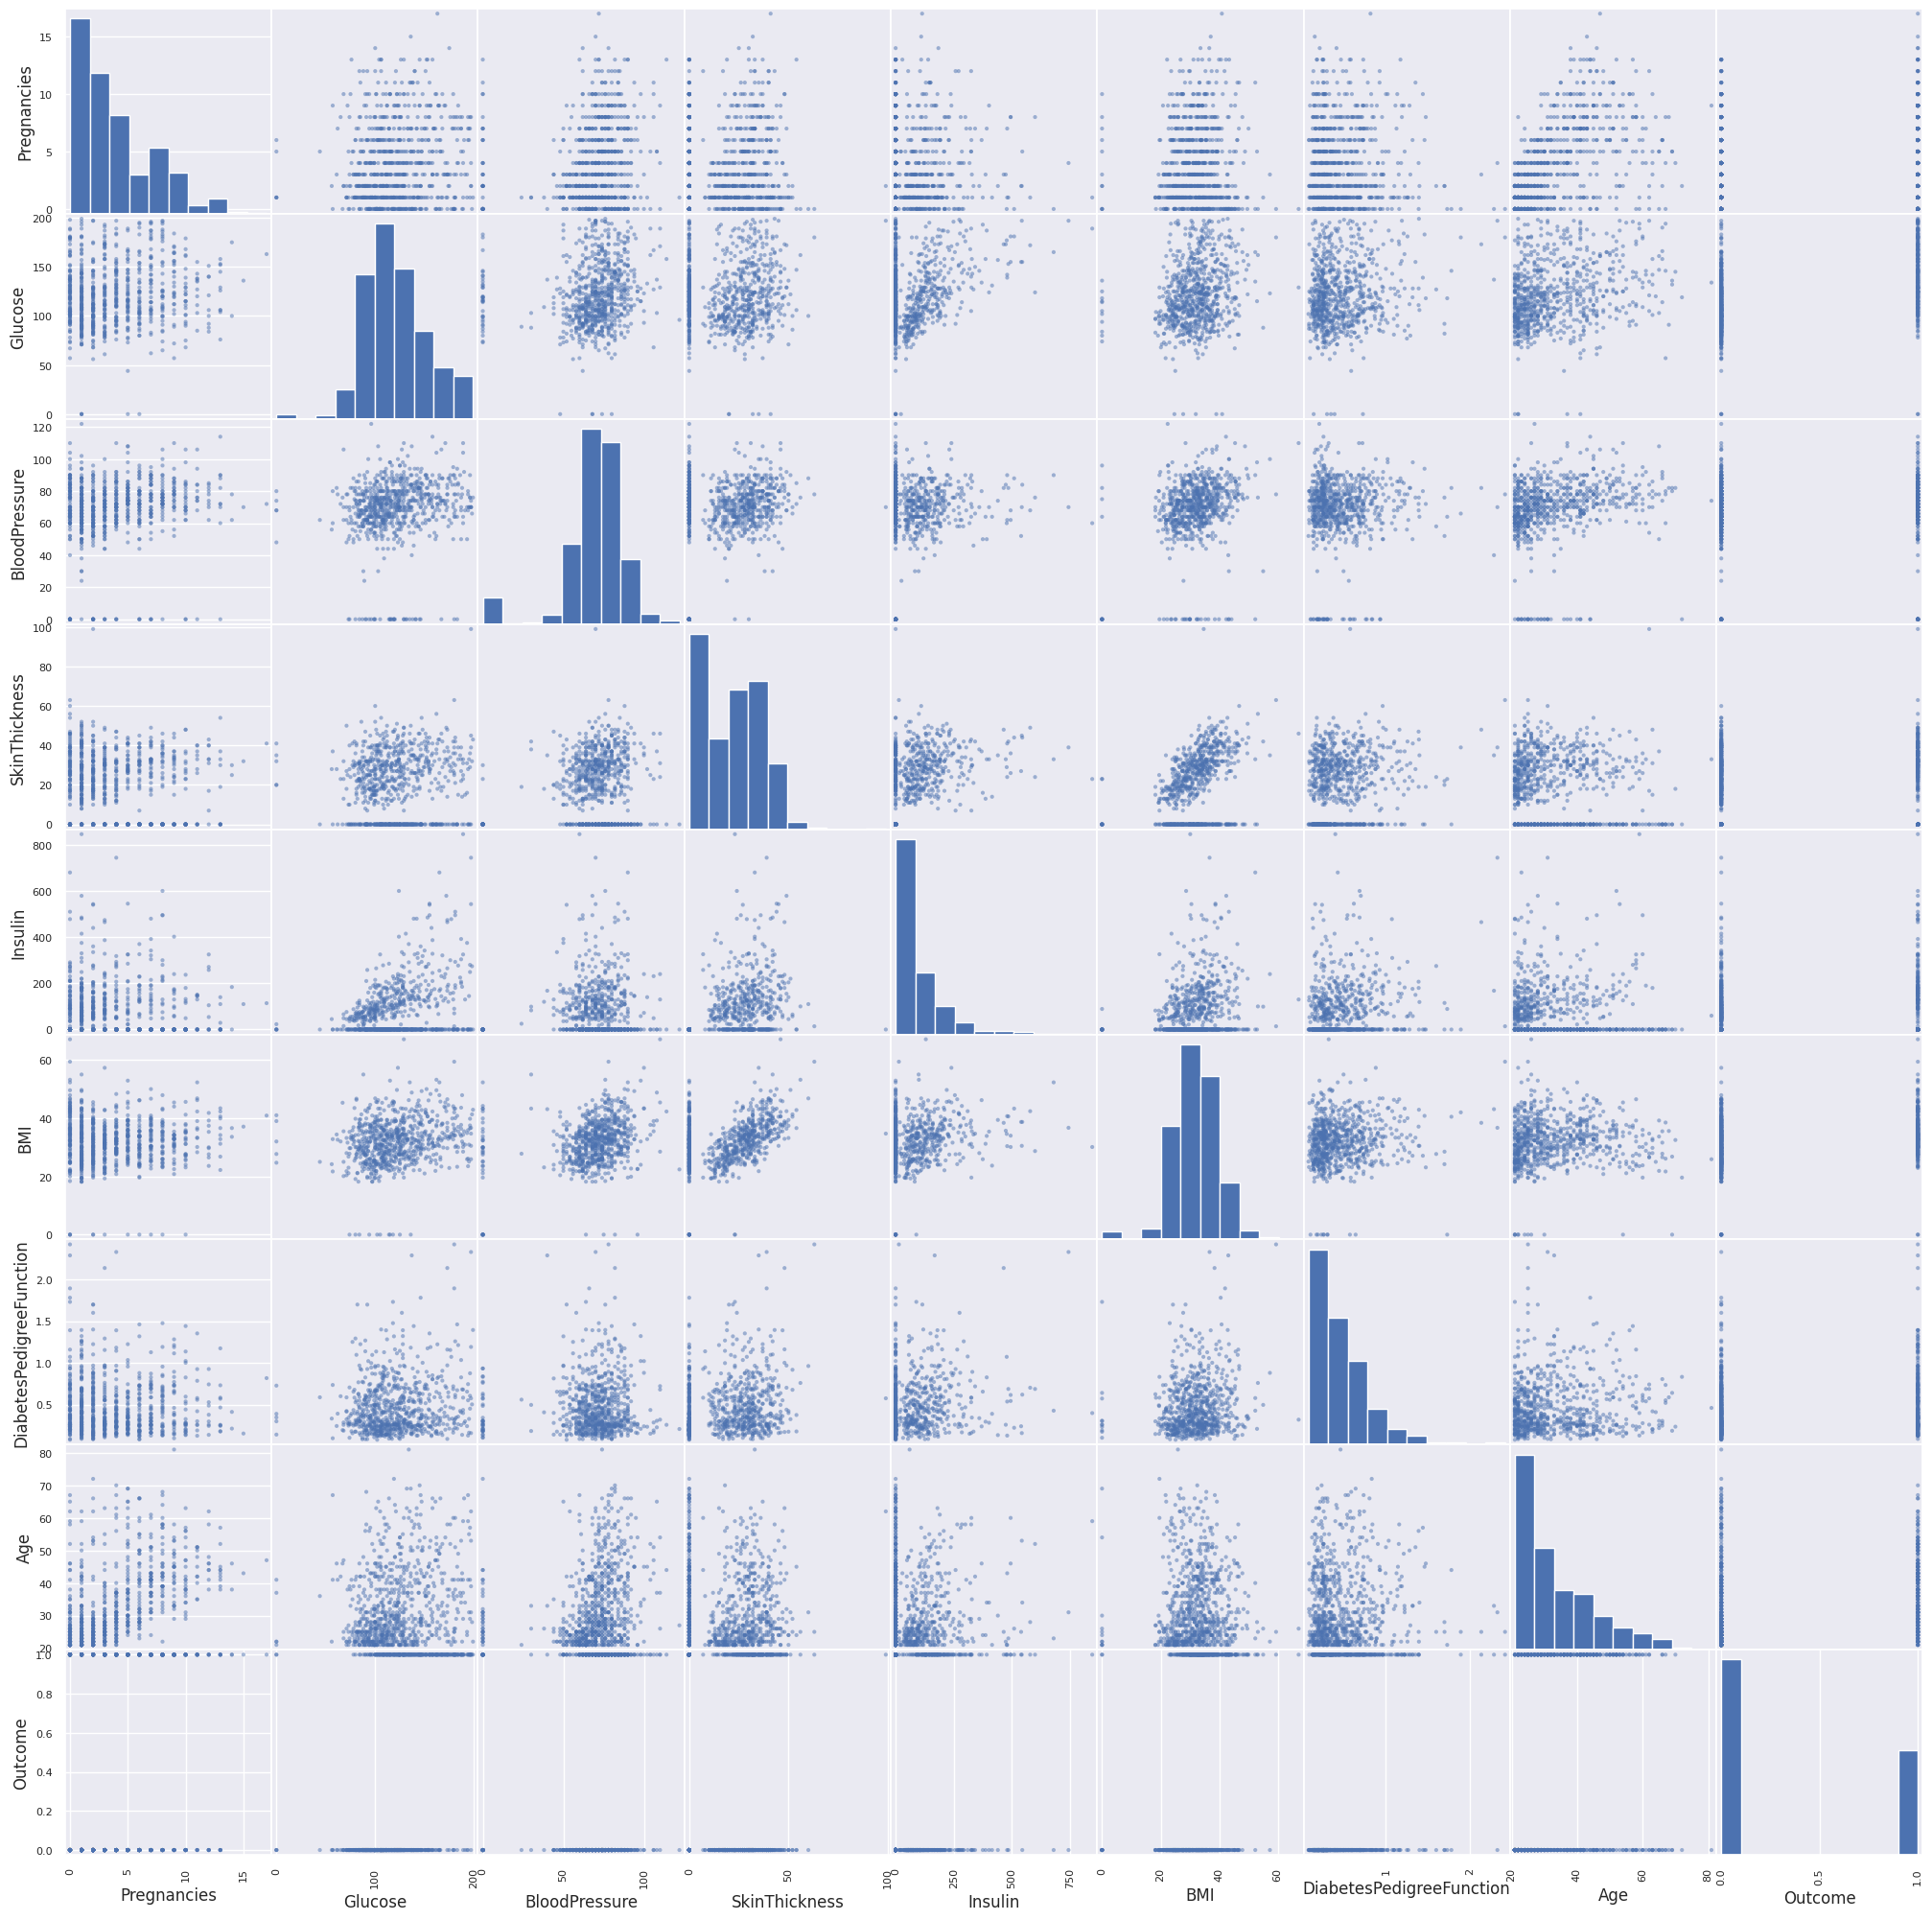

In [28]:
scatter = scatter_matrix(dataset, figsize = (25, 25))

Ploting scatter charts between the pair of vriables to understand the relationships

Findings:


*   Skin Thickness and BMI are highly correlated



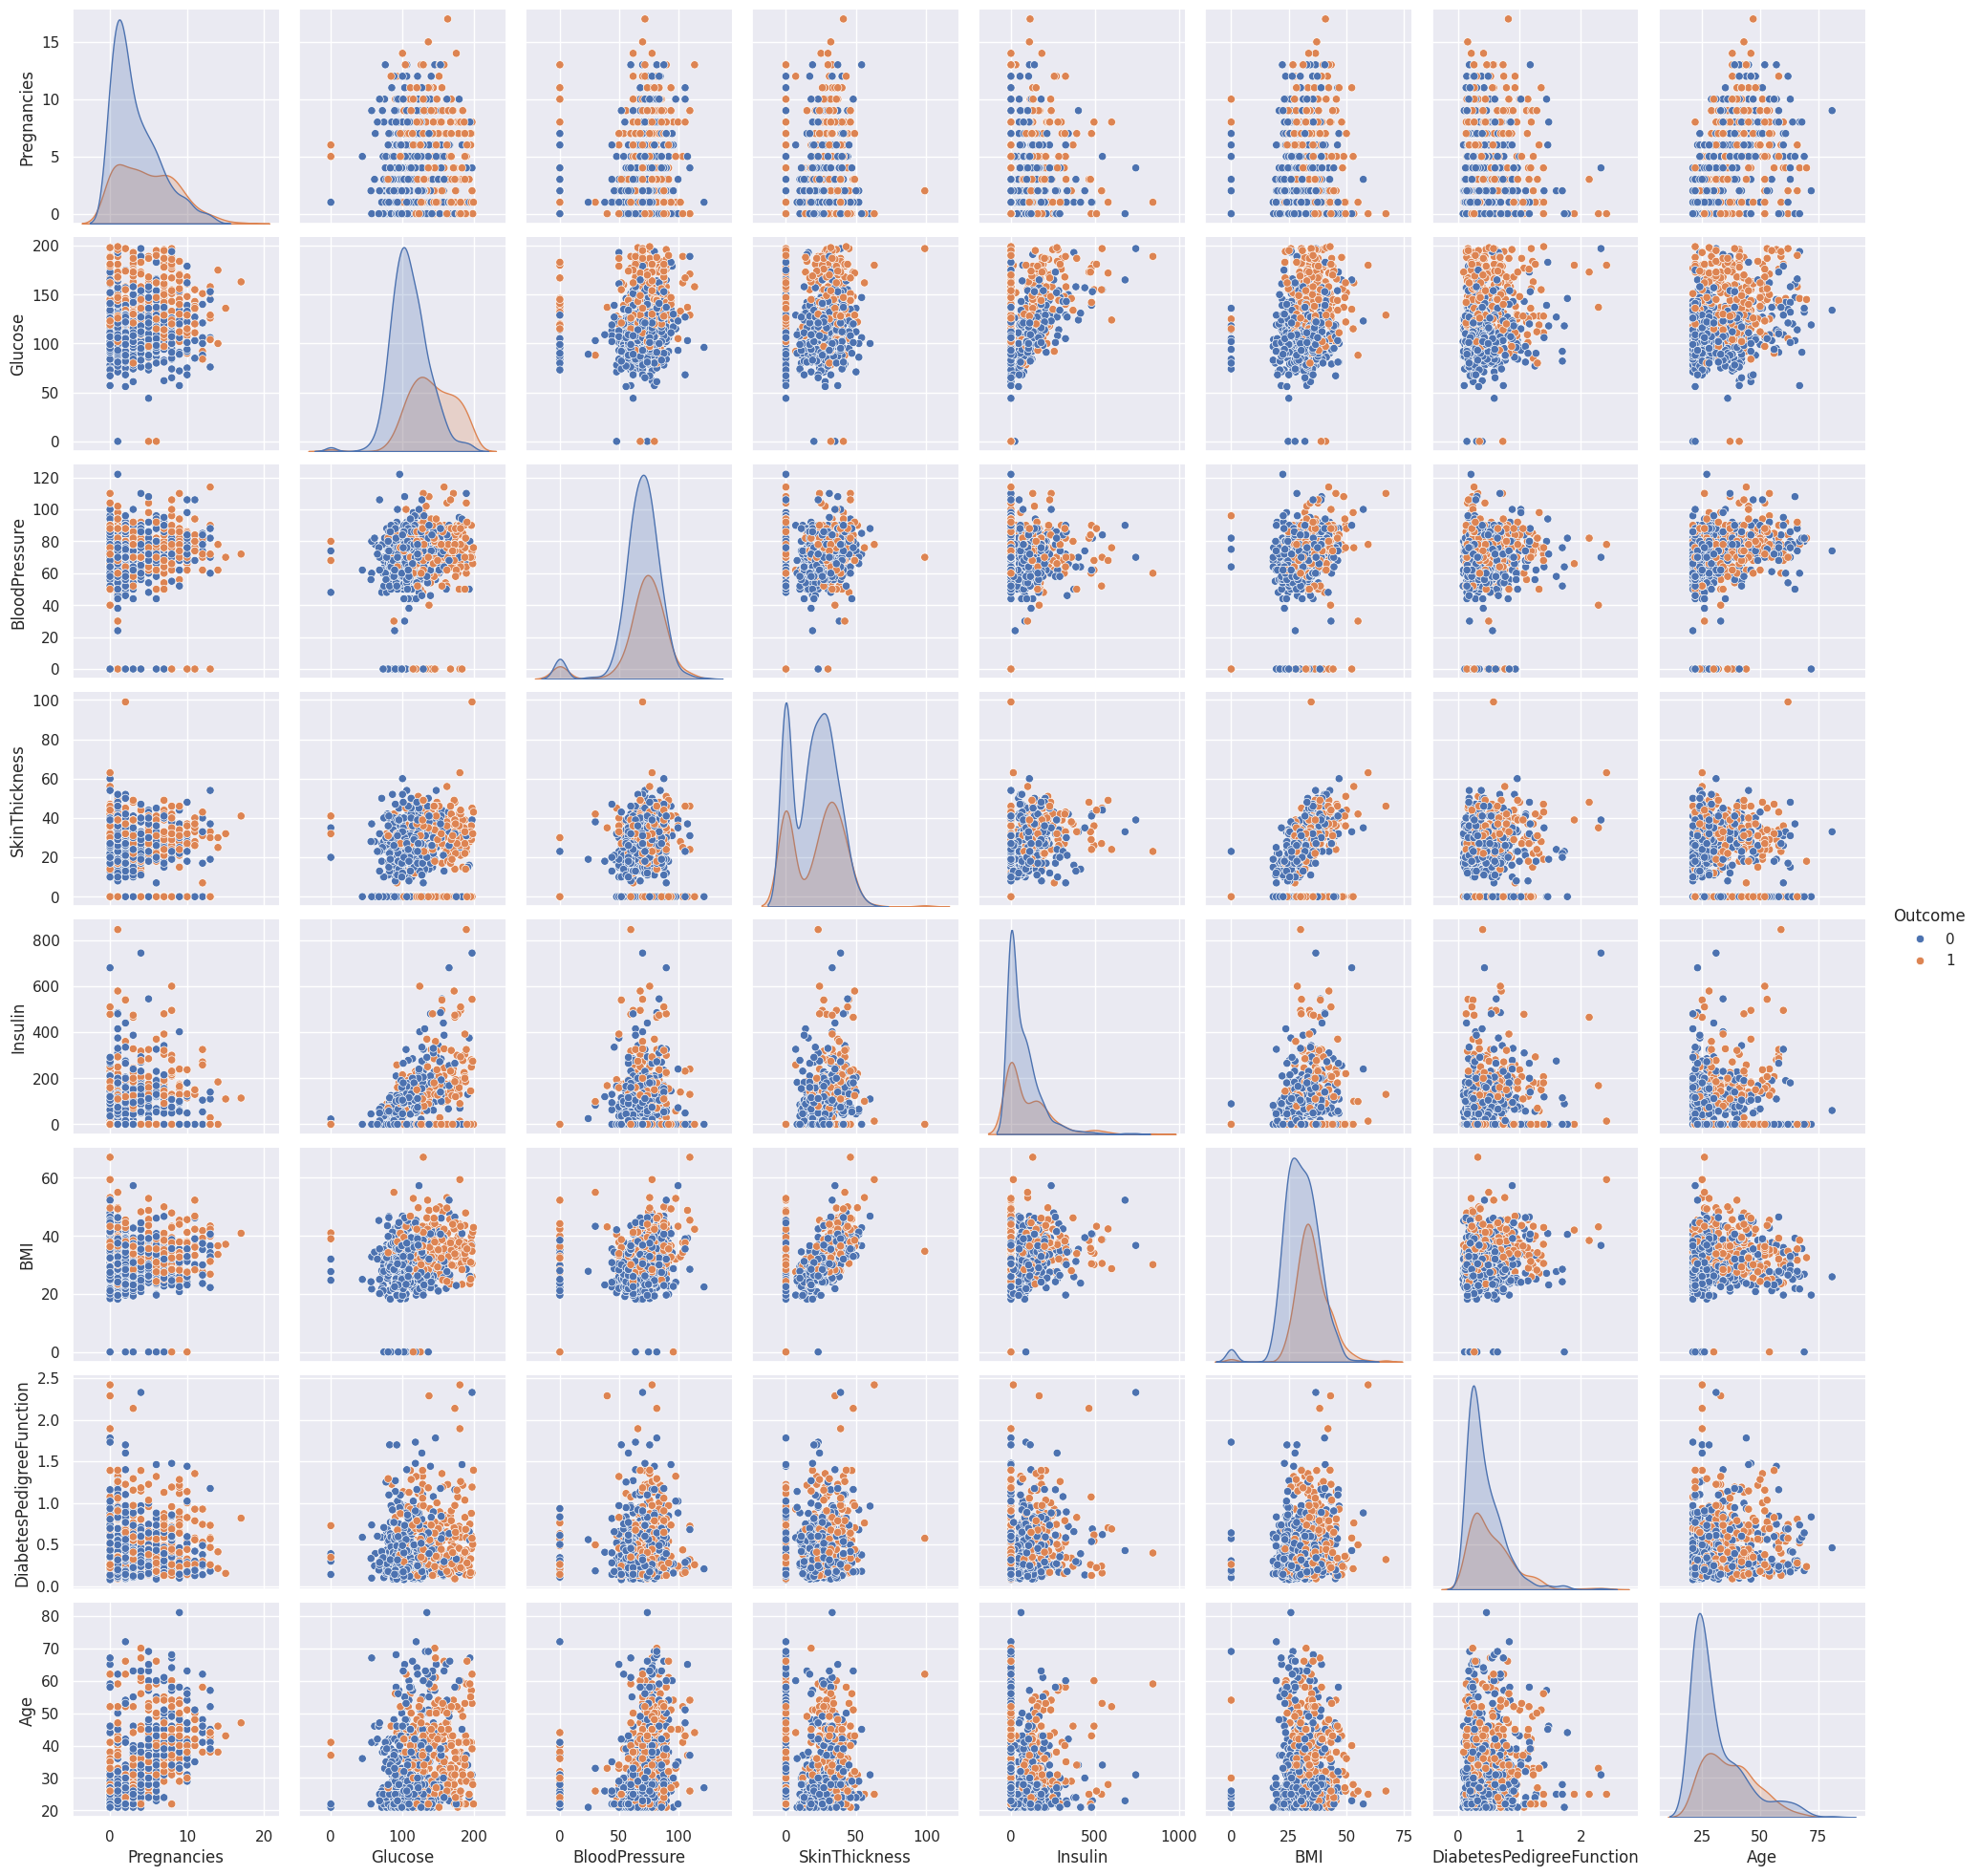

In [29]:
sns.pairplot(dataset, hue = 'Outcome')

**Ploting heatmap for performing correlation analysis**

Findings:



1.   Value 1 represent the correlation between variables with lighter
2.   Value 0 represent the no correlation between variables with darker color



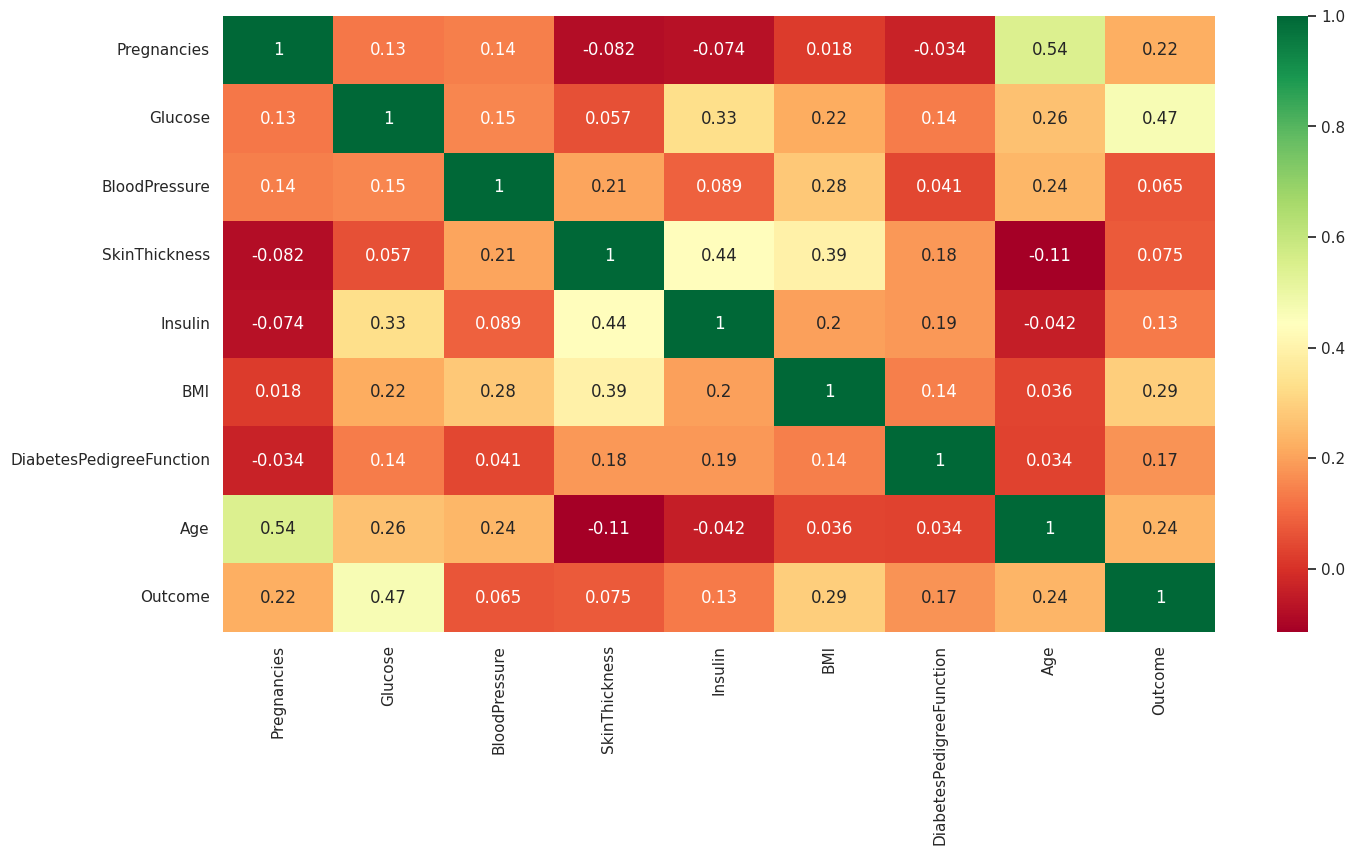

In [30]:
plt.figure(figsize = (16, 8))
heatmap = sns.heatmap(dataset.corr(), annot= True, cmap = 'RdYlGn')

Printing X and Y as feature and target Variables

In [31]:
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [32]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

**Taking care of missing data**

**Checking missing values in dataset**



In [34]:
dataset.isnull().values.any()

False

**Checking null values as '0' present in given dataset**

In [35]:
dataset[dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]==0].count()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Percentage of NaN values present in dataset as '0'**

In [37]:
for i in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
  print(i)
  print(dataset[i].value_counts(normalize = True) [0], '\n')

  #print(dataset[i].value_counts(normalize = True).head(), '\n')
  #print(dataset[i].value_counts(normalize = True).to_frame().iloc[0, :], '\n')
  #print(dataset[datset[value_count()==0].value_counts()]).value_count()

Glucose
0.006510416666666667 

BloodPressure
0.045572916666666664 

SkinThickness
0.2955729166666667 

Insulin
0.4869791666666667 

BMI
0.014322916666666666 



Findings:


1.   In given dataset we have null values represented as '0'

Imputing missing values with 'median'



In [38]:
for i in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    print(i)

    median_values = dataset[dataset[i]!=0][i].median()
    print(median_values, '\n')

    dataset[i].replace(0, median_values, inplace = True)

Glucose
117.0 

BloodPressure
72.0 

SkinThickness
29.0 

Insulin
125.0 

BMI
32.3 



In [39]:
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


**Checking dataset after removing null**

In [40]:
dataset[dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]==0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
dataset.head(2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             66             29      125  26.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0

In [42]:
print(x)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [43]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

**Splitting the dataset into the Training set and Test set**

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0, stratify = y)

In [46]:
print(X_train)

[[  7.    196.     90.    ...  39.8     0.451  41.   ]
 [  2.     81.     72.    ...  30.1     0.547  25.   ]
 [  2.    127.     58.    ...  27.7     1.6    25.   ]
 ...
 [  3.     82.     70.    ...  21.1     0.389  25.   ]
 [  7.    103.     66.    ...  39.1     0.344  31.   ]
 [  0.    161.     50.    ...  21.9     0.254  65.   ]]


In [47]:
print(X_test)

[[2.00e+00 5.60e+01 5.60e+01 ... 2.42e+01 3.32e-01 2.20e+01]
 [1.00e+00 9.20e+01 6.20e+01 ... 1.95e+01 4.82e-01 2.50e+01]
 [1.00e+00 1.00e+02 7.40e+01 ... 1.95e+01 1.49e-01 2.80e+01]
 ...
 [5.00e+00 1.66e+02 7.60e+01 ... 4.57e+01 3.40e-01 2.70e+01]
 [1.00e+00 1.06e+02 7.00e+01 ... 3.42e+01 1.42e-01 2.20e+01]
 [2.00e+00 1.12e+02 6.80e+01 ... 3.41e+01 3.15e-01 2.60e+01]]


In [48]:
print(y_train)

[1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0
 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0
 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 

In [49]:
print(y_test)

[0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0
 1 0 0 1 0 0]


**Feature Scaling**

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
print(X_train)

[[ 0.8803979   2.36205262  1.05918965 ...  1.01966869 -0.07857322
   0.6266495 ]
 [-0.57822139 -1.24433342  0.12746695 ... -0.24027795  0.20235726
  -0.72073607]
 [-0.57822139  0.19822099 -0.59720627 ... -0.55201732  3.28381347
  -0.72073607]
 ...
 [-0.28649754 -1.21297355  0.0239422  ... -1.4093006  -0.26000749
  -0.72073607]
 [ 0.8803979  -0.5544161  -0.18310729 ...  0.92874471 -0.39169365
  -0.21546648]
 [-1.16166911  1.26445686 -1.01130525 ... -1.30538748 -0.65506598
   2.64772786]]


In [53]:
print(X_test)

[[-0.57822139 -2.02833039 -0.70073101 ... -1.00663724 -0.42680996
  -0.97337087]
 [-0.86994525 -0.89937476 -0.39015678 ... -1.61712685  0.01214391
  -0.72073607]
 [-0.86994525 -0.64849573  0.23099169 ... -1.61712685 -0.96233369
  -0.46810128]
 ...
 [ 0.29695018  1.42125626  0.33451644 ...  1.78602799 -0.40339909
  -0.55231288]
 [-0.86994525 -0.46033646  0.0239422  ...  0.29227682 -0.98281821
  -0.97337087]
 [-0.57822139 -0.27217719 -0.07958254 ...  0.27928768 -0.47655807
  -0.63652448]]


**Data Modelling**

Checking the train and test data

In [54]:
print(X_train.shape)

(614, 8)


In [55]:
print(X_test.shape)

(154, 8)


In [56]:
print(y_train.shape)

(614,)


In [57]:
print(y_test.shape)

(154,)


**Training the K-NN model on the Training set**

In [58]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Predicting the Test set results

In [61]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]

**Making the Confusion Matrix**

In [63]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[88 12]
 [23 31]]
0.7727272727272727


Plotting confusion matrix display visual

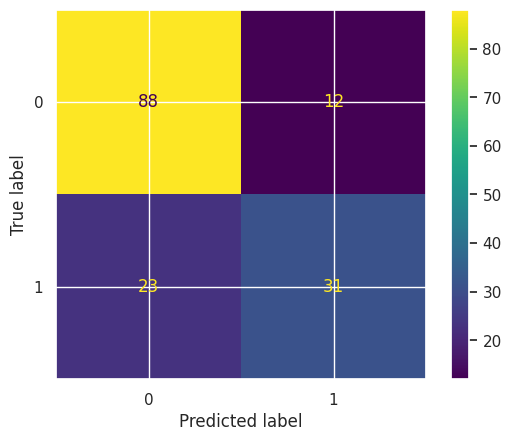

In [64]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()


**Check accuracy model on training data**

In [65]:
classifier.score(X_train, y_train)

0.8143322475570033

**Check accuracy of model on testing data**

In [66]:
classifier.score(X_test, y_test)

0.7727272727272727

**Classification Report**

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       100
           1       0.72      0.57      0.64        54

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



**Plotting pipelines steps**

In [68]:
x, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y)

clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2))
clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

**Training the Naive Bayes model on the Training set**

In [69]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

**Making the Confusion Matrix**

In [ ]:
# print(confusion_matrix(y_test, y_pred))
# print(accuracy_score(y_test,y_pred))

Ploting confusion matrix display visual

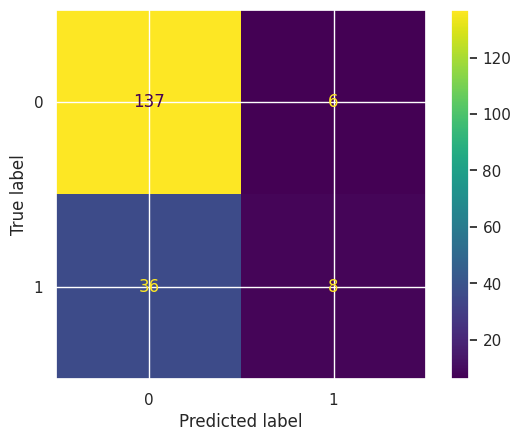

In [70]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()


Check accuracy of model on training data

In [71]:
classifier.score(X_train, y_train)


0.7450980392156863

Check accuracy of model on testing data

In [72]:
classifier.score(X_test, y_test)

0.7754010695187166

Classification report


In [73]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.79      0.96      0.87       143
           2       0.57      0.18      0.28        44

    accuracy                           0.78       187
   macro avg       0.68      0.57      0.57       187
weighted avg       0.74      0.78      0.73       187



Plotting pipeline steps


In [74]:
X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
clf = make_pipeline(StandardScaler(), GaussianNB())
clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

**Training the Random Forest Classification model on the Training set**

In [75]:
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0,)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

Making the Confusion Matrix


In [76]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[132  10]
 [ 41   4]]
0.7272727272727273


Ploting confusion matrix display visual

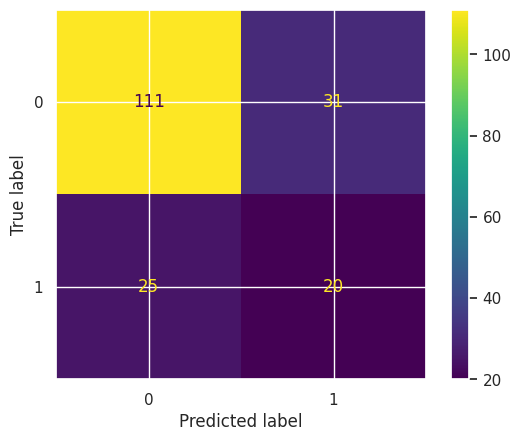

In [77]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

Check accuracy of model on training data


In [78]:
classifier.score(X_test, y_test)


0.7005347593582888

Check accuracy of model on testing data

In [79]:
classifier.score(X_test, y_test)


0.7005347593582888

Classification report


In [80]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.82      0.78      0.80       142
           2       0.39      0.44      0.42        45

    accuracy                           0.70       187
   macro avg       0.60      0.61      0.61       187
weighted avg       0.71      0.70      0.71       187



Plotting pipeline steps


In [81]:
X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))
clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=10,
                                        random_state=0))])

**Training the SVM model on the Training set**

In [83]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit (X_train, y_train)


SVC(kernel='linear', random_state=0)

Making the Confusion Matrix


In [84]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[[103  39]
 [ 33  12]]
0.6149732620320856


Ploting confusion matrix display visual


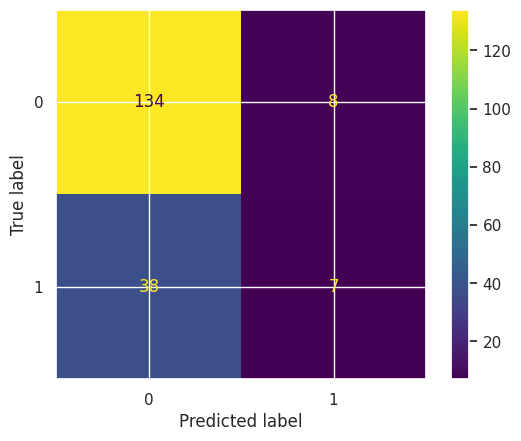

In [85]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()


Check accuracy of model on training data


In [86]:
classifier.score(X_test, y_test)


0.7540106951871658

Check accuracy of model on testing data


In [87]:
classifier.score(X_test, y_test)


0.7540106951871658

Classification report


In [88]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.78      0.94      0.85       142
           2       0.47      0.16      0.23        45

    accuracy                           0.75       187
   macro avg       0.62      0.55      0.54       187
weighted avg       0.70      0.75      0.70       187



Plotting pipeline steps


In [89]:
X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear', random_state = 0))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', random_state=0))])

**Training the Logistic Regression model on the Training set**

In [90]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

Making the Confusion Matrix


In [91]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[[129  13]
 [ 43   2]]
0.7005347593582888


Ploting confusion matrix display visual


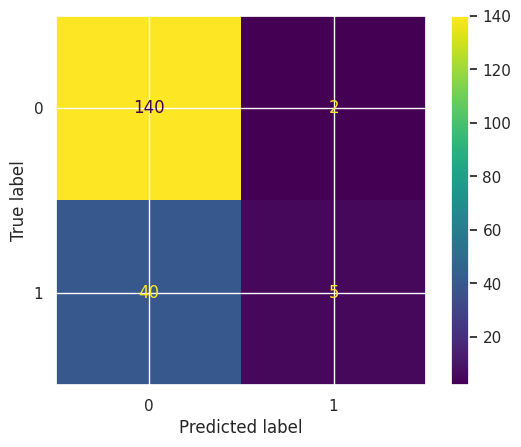

In [92]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()


Check accuracy of model on training data


In [93]:
classifier.score(X_test, y_test)


0.7754010695187166

Check accuracy of model on testing data


In [94]:
classifier.score(X_test, y_test)


0.7754010695187166

Classification report

In [95]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.78      0.99      0.87       142
           2       0.71      0.11      0.19        45

    accuracy                           0.78       187
   macro avg       0.75      0.55      0.53       187
weighted avg       0.76      0.78      0.71       187



Plotting pipeline steps


In [96]:
X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
clf = make_pipeline(StandardScaler(), LogisticRegression(random_state = 0))
clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

**Training XGBoost on the Training set**


In [100]:
y_train = y_train.astype(int) - 1

classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Making the Confusion Matrix


In [102]:
y_pred = classifier.predict(X_test)
y_test = y_test.astype(int) - 1
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[119  23]
 [ 30  15]]


0.7165775401069518

Ploting confusion matrix display visual


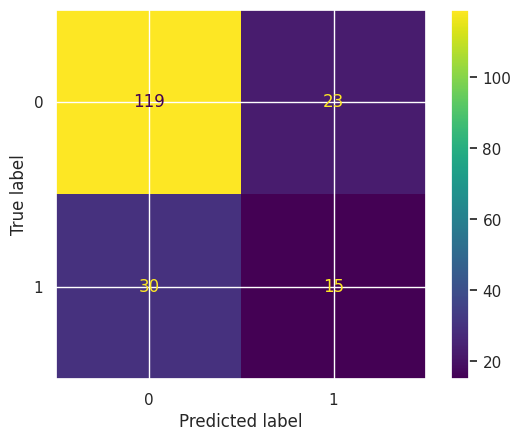

In [103]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

Applying k-Fold Cross Validation


In [104]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 76.12 %
Standard Deviation: 4.99 %


**Training CatBoost on the Training set**

In [105]:
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)


Learning rate set to 0.008049
0:	learn: 0.6890513	total: 52.8ms	remaining: 52.8s
1:	learn: 0.6848378	total: 58.7ms	remaining: 29.3s
2:	learn: 0.6807381	total: 61.7ms	remaining: 20.5s
3:	learn: 0.6768292	total: 63.1ms	remaining: 15.7s
4:	learn: 0.6724762	total: 65.1ms	remaining: 12.9s
5:	learn: 0.6688304	total: 67.2ms	remaining: 11.1s
6:	learn: 0.6647293	total: 69.3ms	remaining: 9.83s
7:	learn: 0.6605547	total: 71.5ms	remaining: 8.87s
8:	learn: 0.6567110	total: 73.9ms	remaining: 8.13s
9:	learn: 0.6530647	total: 75.9ms	remaining: 7.52s
10:	learn: 0.6495361	total: 78.1ms	remaining: 7.03s
11:	learn: 0.6462911	total: 80ms	remaining: 6.58s
12:	learn: 0.6425109	total: 81.5ms	remaining: 6.19s
13:	learn: 0.6392300	total: 83.2ms	remaining: 5.86s
14:	learn: 0.6357880	total: 85.3ms	remaining: 5.6s
15:	learn: 0.6320784	total: 87.3ms	remaining: 5.37s
16:	learn: 0.6291984	total: 88.9ms	remaining: 5.14s
17:	learn: 0.6255687	total: 90.6ms	remaining: 4.94s
18:	learn: 0.6226425	total: 92.7ms	remaining: 4

Making the Confusion Matrix


In [106]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[128  14]
 [ 31  14]]


0.7593582887700535

Ploting confusion matrix display visual

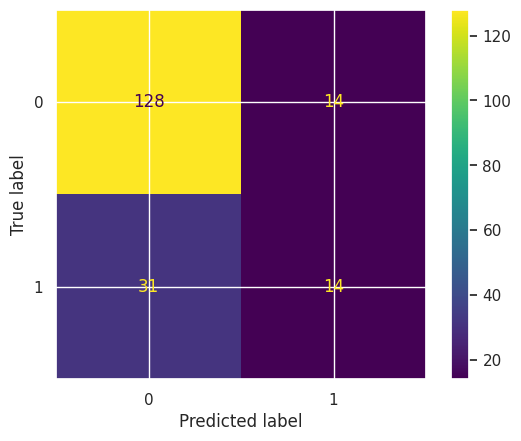

In [107]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

Applying k-Fold Cross Validation

In [108]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6660652	total: 8.57ms	remaining: 1.22s
7:	learn: 0.6622104	total: 10.4ms	remaining: 1.29s
8:	learn: 0.6586779	total: 12.2ms	remaining: 1.35s
9:	learn: 0.6549281	total: 14ms	remaining: 1.39s
10:	learn: 0.6513286	total: 17.1ms	remaining: 1.53s
11:	learn: 0.6480345	total: 18.1ms	remaining: 1.49s
12:	learn: 0.6443778	total: 20.2ms	remaining: 1.53s
13:	learn: 0.6413386	total: 22ms	remaining: 1.55s
14:	learn: 0.6384018	total: 23.7ms	remaining: 1.56s
15:	learn: 0.6351472	total: 25.4ms	remaining: 1.56s
16:	learn: 0.6324068	total: 27.3ms	remaining: 1.58s
17:	learn: 0.6293998	total: 29.4ms	remaining: 1.6s
18:	learn: 0.6262427	total: 31.2ms	remaining: 1.61s
19:	learn: 0.6230581	total: 32.3ms	remaining: 1.58s
20:	learn: 0.6201158	total: 33.1ms	remaining: 1.54s
21:	learn: 0.6173513	total: 34ms	remaining: 1.51s
22:	learn: 0.6145089	total: 34.9ms	remaining: 1.48s
23:	learn: 0.6116285	total: 35.8ms	remaining: 1.45s
24:	learn: 0.6090775	tot

**ROC and AUC Curves**

Training SVC model
**bold text**

In [109]:
X, y = make_classification(random_state=0)
classifier = SVC(random_state = 0)
classifier.fit(X_train, y_train)


SVC(random_state=0)

Create a ROC Curve display from an estimator

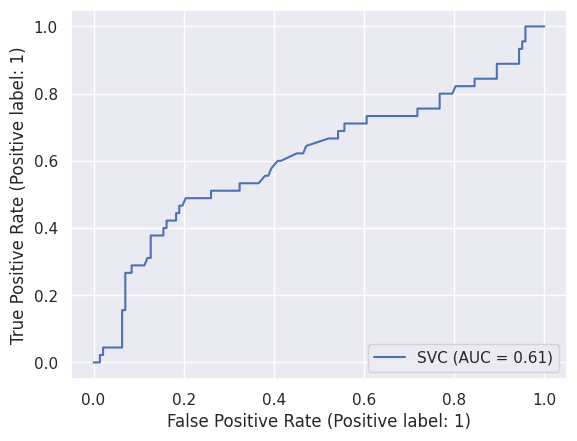

In [110]:
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.show()


Plot ROC curve given the true and predicted values

In [111]:
# generate two class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)
# split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [112]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# logistic regression
model1 = LogisticRegression()
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)

In [113]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [114]:
# auc scores
auc_score1 = roc_auc_score = (y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score = (y_test, pred_prob2[:,1])

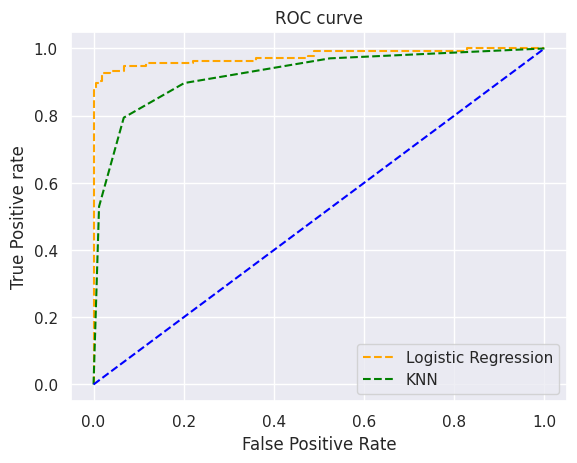

In [118]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--',color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

------------------------------------------------------------------------